In [1]:
import mysql.connector
from mysql.connector import errorcode
import config
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nba_trailing_played = pd.read_csv('NBA_box_scores_trailing3.csv')

In [3]:
nba_trailing_played.head()

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,...,OREB_TRAIL3,DREB_TRAIL3,REB_TRAIL3,PTS_TRAIL3,STL_TRAIL3,AST_TRAIL3,BLK_TRAIL3,TOS_TRAIL3,doubles_TRAIL3,SEC_TRAIL3
0,0,21900001,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,12:29,...,game1,game1,game1,game1,game1,game1,game1,game1,game1,game1
1,1,21900021,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,7:08,...,game2,game2,game2,game2,game2,game2,game2,game2,game2,game2
2,2,21900032,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,NaN,NaN,11:35,...,game3,game3,game3,game3,game3,game3,game3,game3,game3,game3
3,3,21900047,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,C,NaN,12:18,...,1.3333333333333333,2.0,3.3333333333333335,6.0,0.0,0.6666666666666666,0.6666666666666666,0.3333333333333333,0.0,624.0
4,4,21900067,1.610613e+09,NOP,New Orleans,1626143.0,Jahlil Okafor,C,NaN,33:51,...,1.0,3.3333333333333335,4.333333333333333,5.333333333333333,0.3333333333333333,1.0,0.6666666666666666,1.3333333333333333,0.0,620.3333333333334


In [63]:
stats_sub = nba_trailing_played[['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 
                                  'FG3M_TRAIL3', 'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 
                                  'FTM_TRAIL3', 'FTA_TRAIL3', 'FT_PCT_TRAIL3', 'OREB_TRAIL3', 
                                  'DREB_TRAIL3', 'REB_TRAIL3', 'PTS_TRAIL3', 'STL_TRAIL3',
                                  'AST_TRAIL3', 'BLK_TRAIL3', 'TOS_TRAIL3', 'doubles_TRAIL3', 
                                  'SEC_TRAIL3', 'DK_PTS']]

In [64]:
stats_sub.reset_index(drop = True, inplace = True)
stats_sub = stats_sub.replace({'game1': np.nan, 'game2': np.nan, 'game3': np.nan})

In [65]:
from sklearn.preprocessing import PowerTransformer
variables = ['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 'FG3M_TRAIL3', 
             'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 'FTM_TRAIL3', 'FTA_TRAIL3', 'FT_PCT_TRAIL3', 
             'OREB_TRAIL3', 'DREB_TRAIL3', 'REB_TRAIL3', 'PTS_TRAIL3', 'STL_TRAIL3',
             'AST_TRAIL3', 'BLK_TRAIL3', 'TOS_TRAIL3', 'DK_PTS', 'doubles_TRAIL3']

stats_sub_transform = stats_sub.copy()

# Power Transform Variables

In [66]:
scaler = PowerTransformer(method = 'yeo-johnson', standardize = True)
scaler.fit(stats_sub[variables])
stats_sub_transform[variables] = scaler.transform(stats_sub[variables])

In [67]:
scaler.lambdas_

array([ 0.28138728,  0.38246308,  1.53985973, -0.36248259,  0.22490021,
       -0.20002773, -0.28941976, -0.12613955,  0.58164481, -0.64094182,
        0.11941519,  0.12680274,  0.36944383, -0.44517502, -0.19285802,
       -1.43300874, -0.15456539,  0.50701215, -0.35365423])

In [68]:
all_vars = ['FGM_TRAIL3', 'FGA_TRAIL3', 'FG_PCT_TRAIL3', 'FG3M_TRAIL3', 
            'FG3A_TRAIL3', 'FG3_PCT_TRAIL3', 'FTM_TRAIL3', 'FTA_TRAIL3', 
            'FT_PCT_TRAIL3', 'OREB_TRAIL3', 'DREB_TRAIL3', 'REB_TRAIL3', 
            'PTS_TRAIL3', 'STL_TRAIL3', 'AST_TRAIL3', 'BLK_TRAIL3', 
            'TOS_TRAIL3', 'doubles_TRAIL3', 'SEC_TRAIL3', 'DK_PTS']

vars_of_interest = ['FGA_TRAIL3', 'AST_TRAIL3', 'TOS_TRAIL3', 'REB_TRAIL3', 'DK_PTS']

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


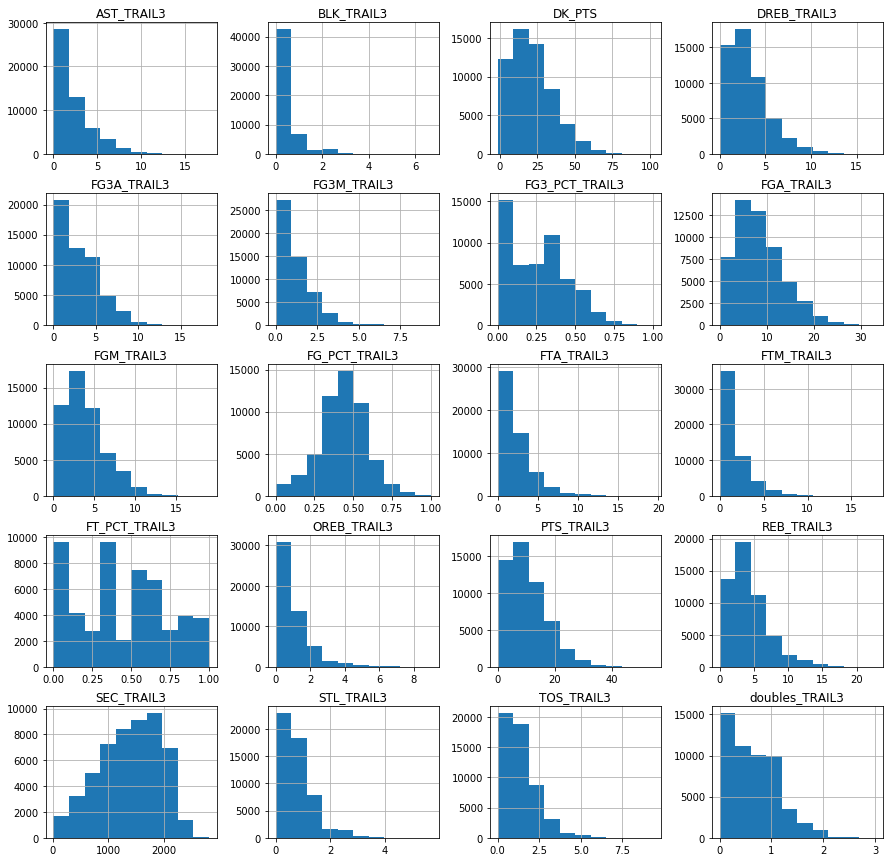

In [69]:
stats_sub = stats_sub.astype(float)
stats_sub_transform = stats_sub_transform.astype(float)

fig = plt.figure(figsize=(15,15))
ax = fig.gca()
stats_sub.hist(ax = ax);

plt.savefig('fig1_untransformed_variables.jpg')

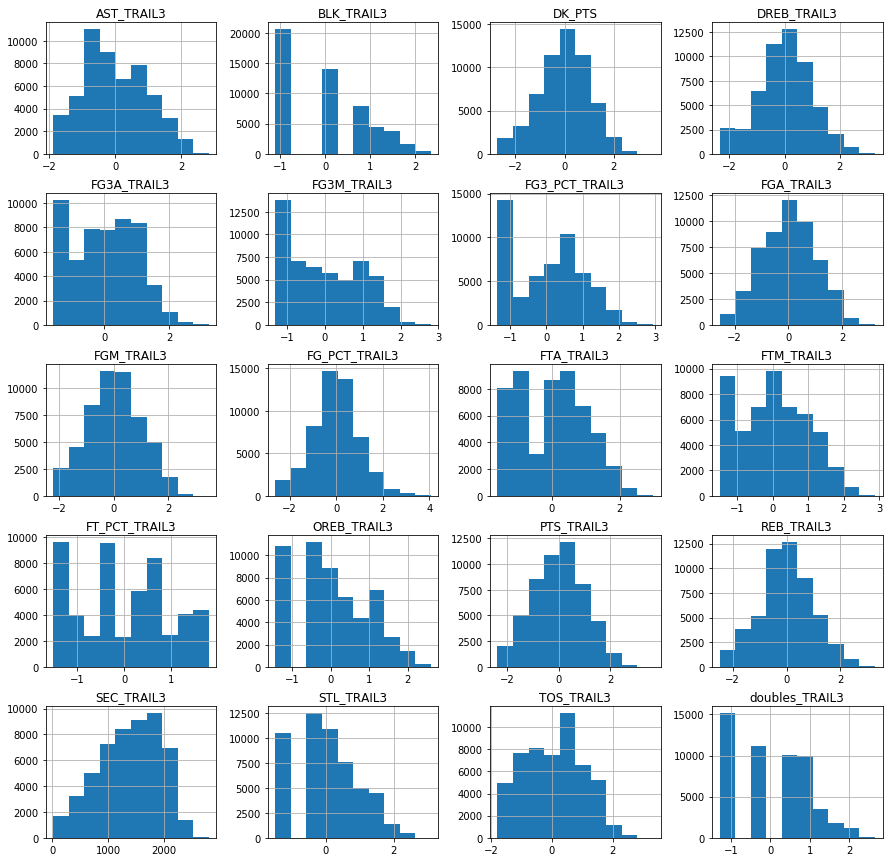

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
stats_sub_transform[all_vars].hist(ax = ax);
plt.savefig('fig2_transformed_variables.jpg')

# Base Model

In [16]:
lm_attempt1 = stats_sub_transform[all_vars]
lm_attempt1.dropna(inplace = True)

outcome = 'DK_PTS'
Y = lm_attempt1[['DK_PTS']]
Y.reset_index(drop = True, inplace = True)
predictors = lm_attempt1.drop('DK_PTS', axis=1)
predictors.reset_index(drop = True, inplace = True)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [17]:
X_train, X_test, y_train, y_test = train_test_split(predictors, Y, test_size=0.30, random_state=34567)

In [18]:
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

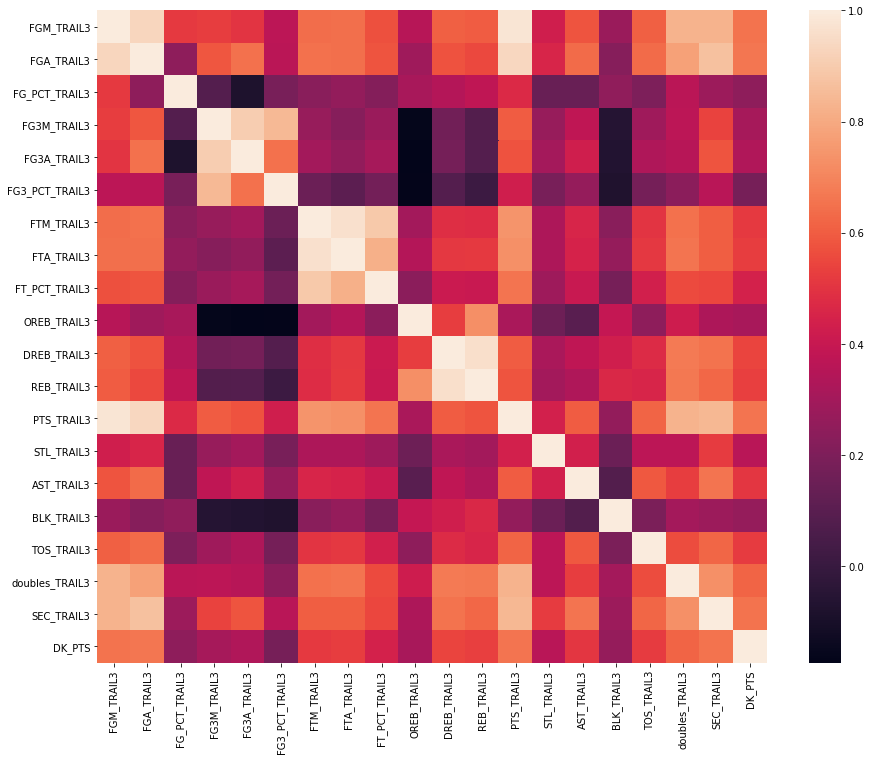

In [73]:
corr_train = train_data.corr()
fig = plt.figure(figsize = (15, 12))
ax = fig.gca()
sns.heatmap(corr_train, ax = ax)
plt.savefig('fig3_correlation_matrix_all_variables.jpg')

In [20]:
corr_unstacked = corr_train.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort")
corr_df = pd.DataFrame(sorted_corr)
corr_df.columns = ['correlation']
corr_df.reset_index(inplace = True)
pts = corr_df[(corr_df['level_0'] == 'PTS_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
# pts_ = corr_df[(corr_df['level_0'] == 'PTS') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
fga = corr_df[(corr_df['level_0'] == 'FGA_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
reb = corr_df[(corr_df['level_0'] == 'REB_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
ast = corr_df[(corr_df['level_0'] == 'AST_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
blk = corr_df[(corr_df['level_0'] == 'BLK_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
dk_pts = corr_df[(corr_df['level_0'] == 'DK_PTS') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)
sec = corr_df[(corr_df['level_0'] == 'SEC_TRAIL3') & (corr_df['correlation'] < 1)].sort_values(by = 'correlation', ascending = False)

In [21]:
# pts.reset_index(inplace = True, drop = True)
pts.reset_index(inplace = True, drop = True)
fga.reset_index(inplace = True, drop = True)
reb.reset_index(inplace = True, drop = True)
ast.reset_index(inplace = True, drop = True)
blk.reset_index(inplace = True, drop = True)
dk_pts.reset_index(inplace = True, drop = True)
sec.reset_index(inplace = True, drop = True)

In [22]:
formula

'DK_PTS~FGM_TRAIL3+FGA_TRAIL3+FG_PCT_TRAIL3+FG3M_TRAIL3+FG3A_TRAIL3+FG3_PCT_TRAIL3+FTM_TRAIL3+FTA_TRAIL3+FT_PCT_TRAIL3+OREB_TRAIL3+DREB_TRAIL3+REB_TRAIL3+PTS_TRAIL3+STL_TRAIL3+AST_TRAIL3+BLK_TRAIL3+TOS_TRAIL3+doubles_TRAIL3+SEC_TRAIL3'

In [26]:
train_data = train_data.astype(float)

In [32]:
train_data.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=train_data).fit()
model.summary().tables[2]

Omnibus:,98.036,Durbin-Watson:,2.010
Prob(Omnibus):,0.000,Jarque-Bera (JB):,107.856
Skew:,-0.089,Prob(JB):,3.80e-24
Kurtosis:,3.196,Cond. No.,2.91e+04


# Second Model

In [34]:
lm_attempt2 = stats_sub_transform[vars_of_interest]
lm_attempt2.dropna(inplace = True)

outcome = 'DK_PTS'
Y2 = lm_attempt2[['DK_PTS']]
Y2.reset_index(drop = True, inplace = True)
predictors2 = lm_attempt2.drop('DK_PTS', axis=1)
predictors2.reset_index(drop = True, inplace = True)
pred_sum = "+".join(predictors2.columns)
formula = outcome + "~" + pred_sum

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(predictors2, Y2, test_size=0.30, random_state=34567)

In [36]:
train_data2 = pd.concat([X_train2, y_train2], axis = 1)
test_data2 = pd.concat([X_test2, y_test2], axis = 1)

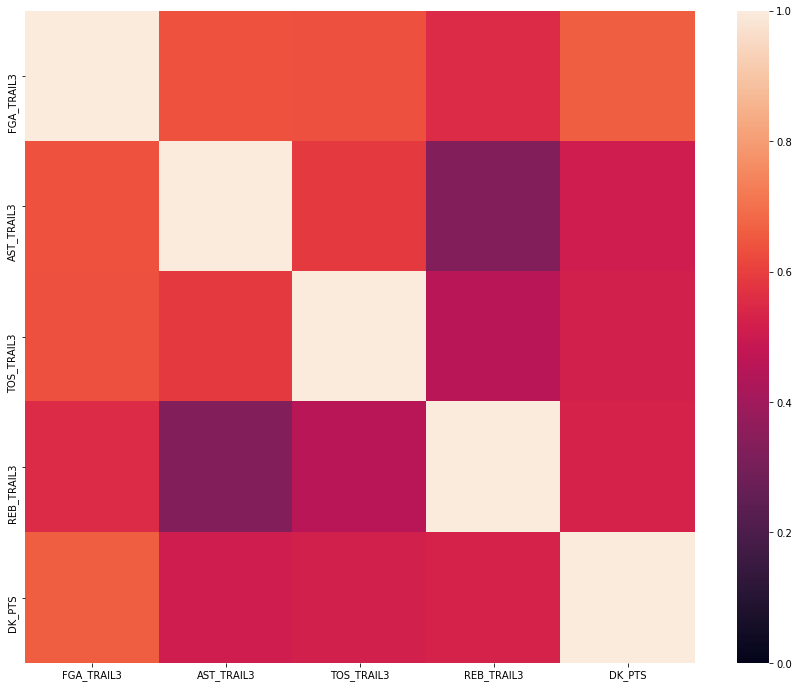

In [74]:
corr_train2 = train_data2.corr()
fig = plt.figure(figsize = (15, 12))
ax = fig.gca()
sns.heatmap(corr_train2, vmin = 0, vmax = 1, ax = ax)
plt.savefig('fig4_correlation_matrix_final_vars.jpg')

In [76]:
train_data2.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=train_data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     9079.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:48:45   Log-Likelihood:                -39367.
No. Observations:               37006   AIC:                         7.874e+04
Df Residuals:                   37001   BIC:                         7.879e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0292      0.004      8.009      0.000       0.022       0.036
FGA_TRAIL3     0.3936      0.006     69.915      0.000       0.383       0.405
AST_TRAIL3     0.1244      0.005     24.855      0.000       0.115       0.134
TOS_TRAIL3     0.0879      0.005     17.376      0.000       0.078       0.098
REB_TRAIL3     0.2245      0.004     50.419      0.000       0.216       0.233
==============================================================================
Omnibus:                      122.993   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.209
Skew:                          -0.112   Prob(JB):                     1.96e-29
Kurtosis:                       3.190   Cond. No.                         2.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

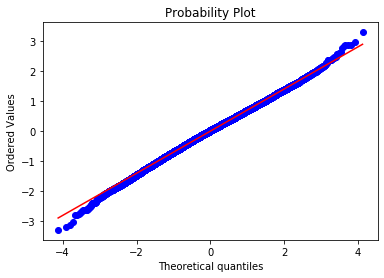

In [78]:
figure = plt.figure()
ax = figure.gca()
stats.probplot(model.resid, dist = 'norm', plot = ax)
plt.savefig('fig5_final_model_residuals.jpg')

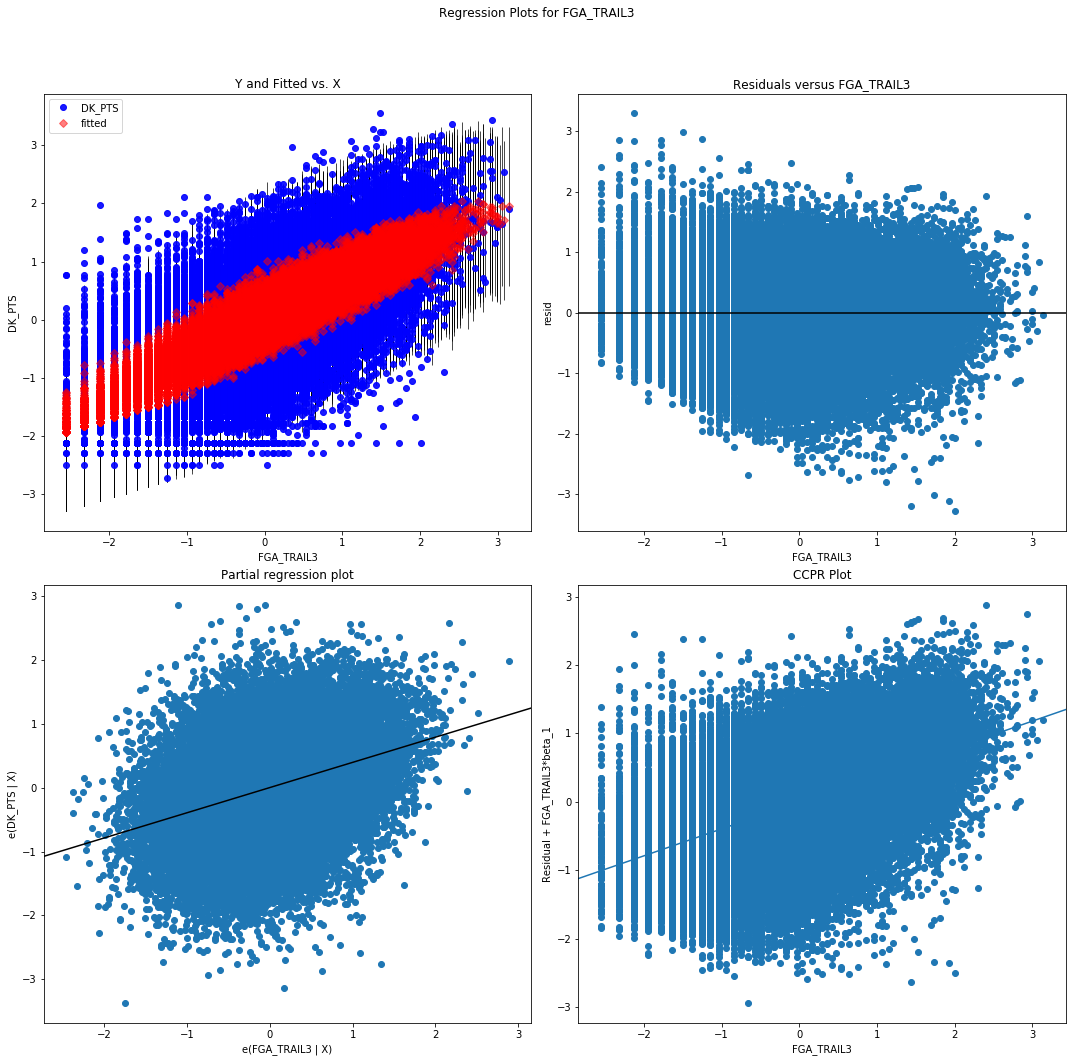

In [44]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "FGA_TRAIL3", fig=fig)

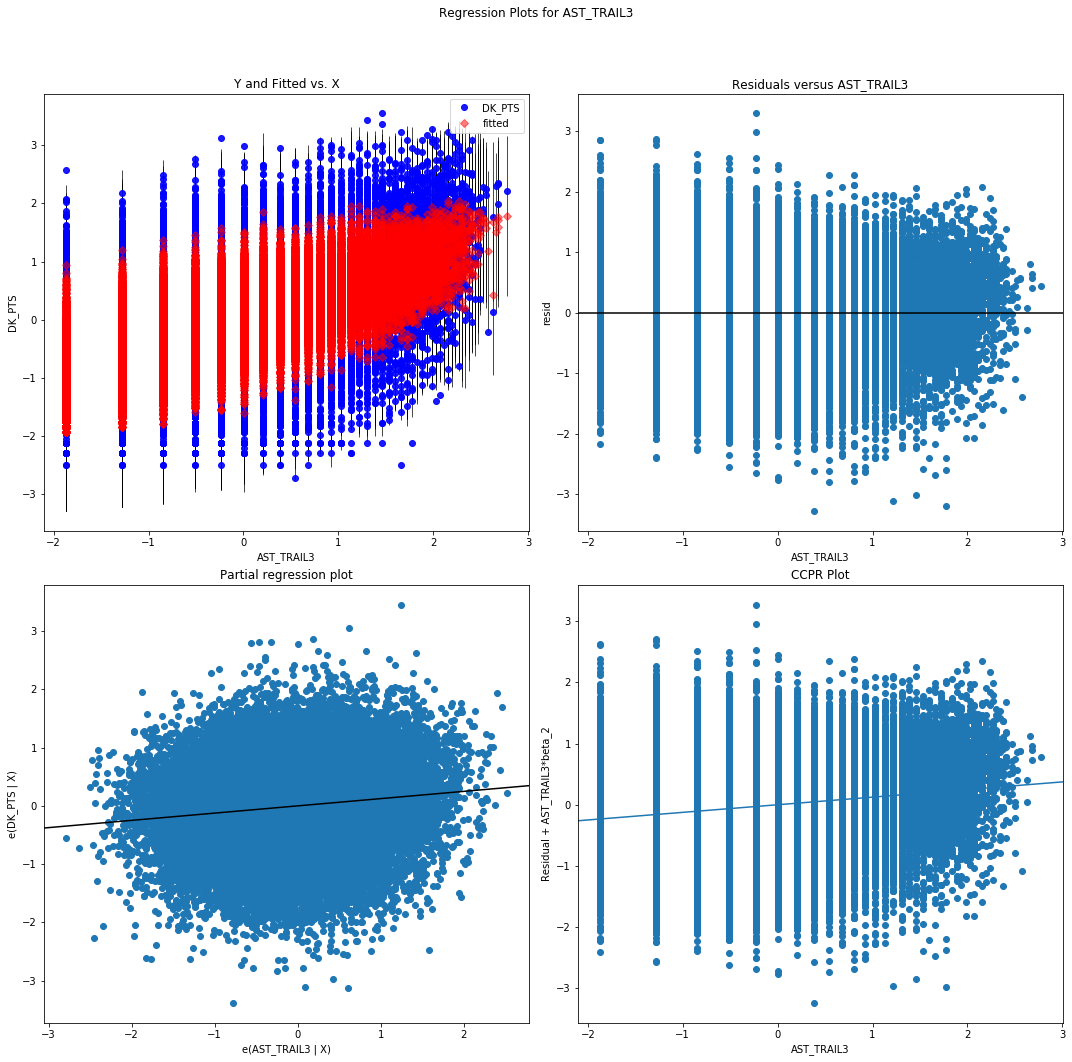

In [45]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "AST_TRAIL3", fig=fig)

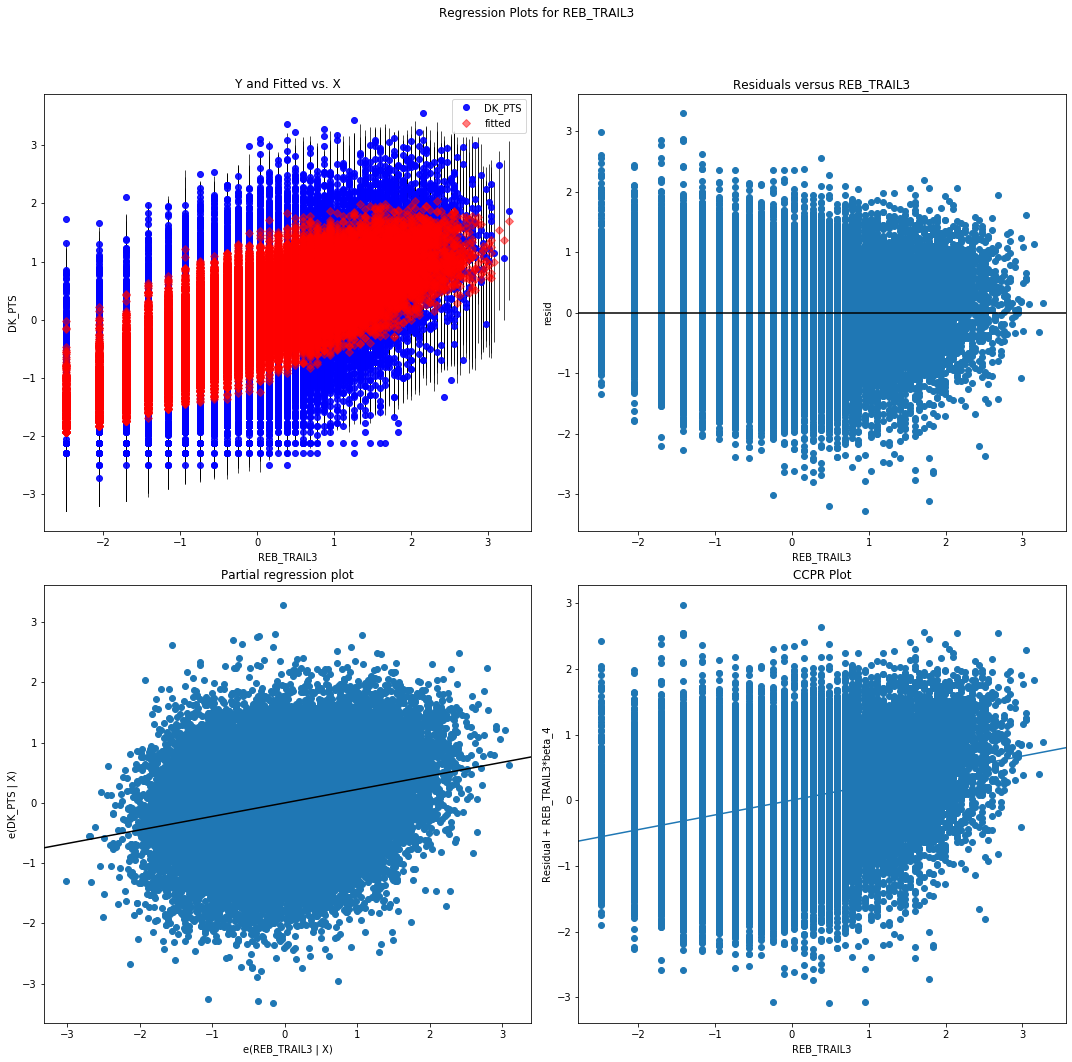

In [46]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "REB_TRAIL3", fig=fig)

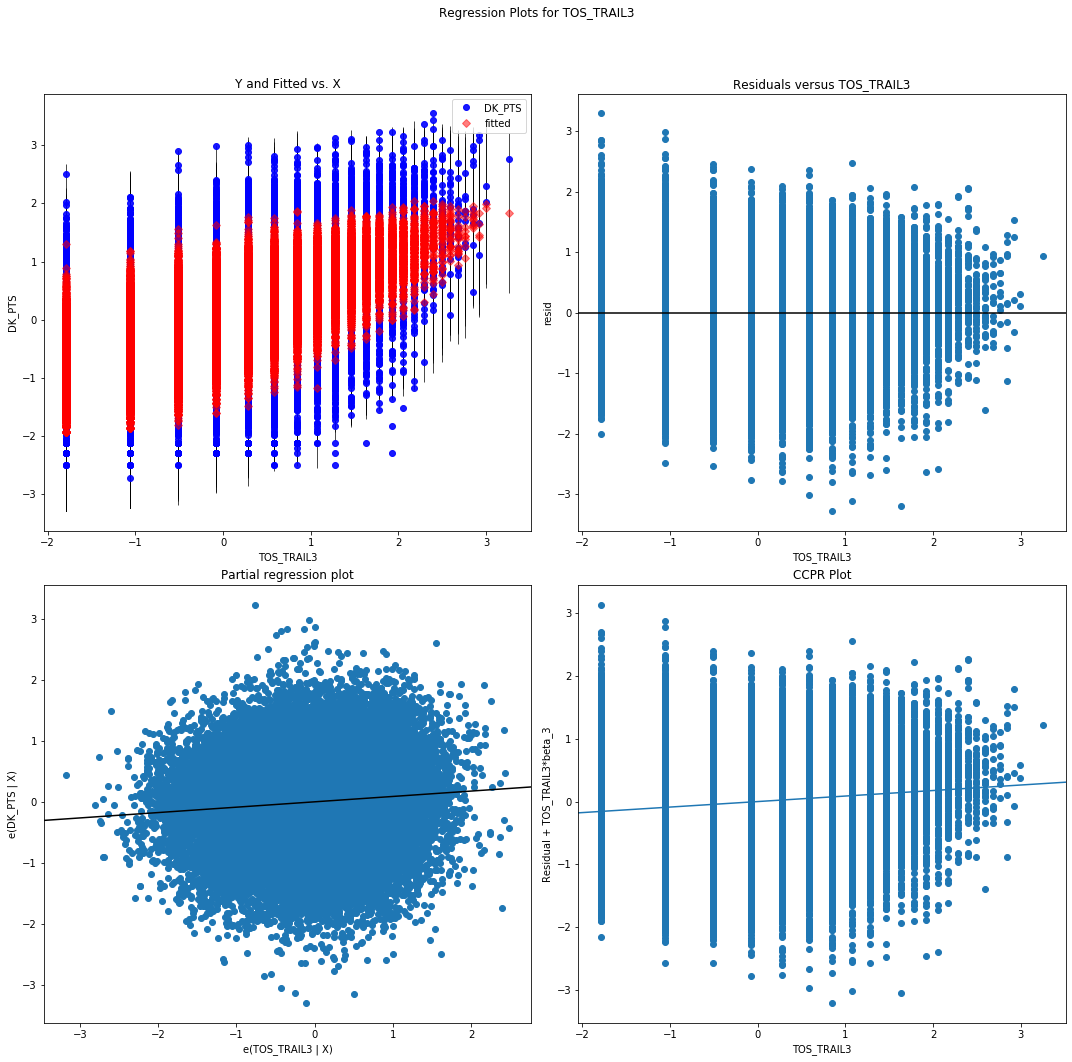

In [47]:
fig = plt.figure(figsize = (15, 15))
fig = sm.graphics.plot_regress_exog(model, "TOS_TRAIL3", fig=fig)

In [75]:
model = ols(formula='DK_PTS~AST_TRAIL3 + REB_TRAIL3', data=train_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:44:43   Log-Likelihood:                -42382.
No. Observations:               37006   AIC:                         8.477e+04
Df Residuals:                   37003   BIC:                         8.480e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0294      0.004      7.436      0.000       0.022       0.037
AST_TRAIL3     0.3687      0.004     87.905      0.000       0.361       0.377
REB_TRAIL3     0.4018      0.004     95.973      0.000       0.394       0.410
==============================================================================
Omnibus:                       90.201   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.665
Skew:                          -0.119   Prob(JB):                     2.05e-20
Kurtosis:                       2.952   Cond. No.                         1.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Run model on test data

In [85]:
test_data2.reset_index(inplace = True, drop = True)
model = ols(formula=formula, data=test_data2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 DK_PTS   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     3795.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:55:17   Log-Likelihood:                -16969.
No. Observations:               15860   AIC:                         3.395e+04
Df Residuals:                   15855   BIC:                         3.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0311      0.006      5.545      0.000       0.020       0.042
FGA_TRAIL3     0.3861      0.009     44.589      0.000       0.369       0.403
AST_TRAIL3     0.1247      0.008     16.351      0.000       0.110       0.140
TOS_TRAIL3     0.0922      0.008     11.906      0.000       0.077       0.107
REB_TRAIL3     0.2241      0.007     32.627      0.000       0.211       0.238
==============================================================================
Omnibus:                       67.598   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.356
Skew:                          -0.126   Prob(JB):                     1.18e-16
Kurtosis:                       3.218   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""